In [211]:
import numpy as np
import sys
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import math

In [220]:
#hierarchial cluster computation
def hierarchialClustering(file,number_of_clusters):
    global geneCount
    global geneAttributeCount
    global geneexp
    global numberofclusters
    path=file
    numberofclusters=number_of_clusters
    # read file as lines into genes array
    file = open(path , 'r')
    genes=file.readlines();
    geneCount=len(genes)
    geneAttributeCount=len(genes[0].split('\t'))
    
    print ('parameters', geneCount, '|', geneAttributeCount)
    
    #matrix for storing gene attributes
    geneexp=np.zeros((geneCount,geneAttributeCount),dtype=np.float64)
    ground_t=[]
    index_dict={}
    for i in range (geneCount):
        geneexp[i]=np.array(genes[i].split('\t'))
        index_dict[i]=str(i+1)
        ground_t.append(int(genes[i].split('\t')[1]))
    
    if(numberofclusters>geneCount):
        sys.exit("Not enough values")
        

    # euclidean distance, computing distance matrix
    distmatrix = squareform(pdist(geneexp[0:geneCount,2:geneAttributeCount], 'euclidean'))
    #print(distmatrix)
    #print("dimensions of dist matrix---------------------------")
    #print(distmatrix.shape)
    
    counter=-1

    while counter!=(geneCount-int(numberofclusters)-1):
        
        counter=0
        for k in index_dict:
            if index_dict[k]=='empty':
                counter+=1
        #print('counter', geneCount-int(numberofclusters)-1)
        
        minimum=(distmatrix[distmatrix>0]).min()
        min_index=np.where(distmatrix==minimum)[-1]
        #print(min_index)
        x=min_index[-2]
        y=min_index[-1]
        for i in range(0,geneCount):
        # recompute dist matrix after combining clusters
            distmatrix[x][i]=min(distmatrix[x][i],distmatrix[y][i])
            distmatrix[y][i]= 0     # diagonally mirrored hence redundant value
            distmatrix[i][x]=min(distmatrix[i][x],distmatrix[i][y])
            distmatrix[i][y]= 0
    
        #combine clusters in map and delete old entry
        index_dict[x]=index_dict[x]+','+(index_dict[y])
        print("combined-----------------------------------")
        print(index_dict[x])
        index_dict[y]="empty"
        
    #print("dist matrix updated---------------------------")   
    #print(distmatrix)
    marker=0
    clusters=[]
    #print("index dict-------------------------------------")
    #print(index_dict)
    
    for i in range(numberofclusters):
        clusters.append([])
    for i in range(geneCount):
        if index_dict[i]!='empty':
            clusters[marker].append(index_dict[i])
            marker+=1
    #print("len of clusters--------------------------------")
    #print (len(clusters))

    finalclusters=[]
    for i in range(len(clusters)):
        finalclusters.append([])
    
    for i in range(len(clusters)):    
        cluster_set=clusters[i]
        temp=[]
        for clust in cluster_set:
            for pt in clust.split(','):
                temp.append(int(pt))
        finalclusters[i]=temp  
    print("finalclusters-----------------------------------")
    print(finalclusters)
    return finalclusters,ground_t

In [221]:
def hac_labels(clusterlist):
    
    #print (len(clusterlist))
    result=[0]*geneCount
    clustername=1
    
    for labels in clusterlist:
        for l in labels:
            result[l-1]=clustername
        clustername+=1
    
    #print(result)
    return result

In [222]:
def plotPCA(geneexp,labels,plot_title):
    data=geneexp[:,2:geneAttributeCount]
    pca = PCA(n_components=2)
    data = np.matrix(data).T
    pca.fit(data)
    data_pca = pca.components_
    title =  plot_title
    plt.figure(figsize=(8,5))
    px=data_pca[0,]
    py=data_pca[1,]
    unique = list(set(labels))
    colors = [plt.cm.jet(float(i)/max(unique)) for i in unique]
    for i, u in enumerate(unique):
        xi = [px[j] for j  in range(len(px)) if labels[j] == u]
        yi = [py[j] for j  in range(len(px)) if labels[j] == u]
        plt.scatter(xi, yi, c=colors[i], label=str(u))
    
    plt.legend()
    plt.title(title)
    plt.show()

In [223]:
def compute_externalIndex(original_data,cluster_indices):
    m11=0
    m10=0
    m01=0
    m00=0
    
    for i in range(0,len(original_data)):
        gene1_ground_truth=int(original_data[i:i+1,1:2][0])
        gene1_data=original_data[i:i+1,2:original_data.shape[1]][0]
        for cluster in range(len(cluster_indices)):
            if((i+1) in cluster_indices[cluster]):
                gene1_cluster_number=cluster
                break
        for j in range(0,original_data.shape[0]):
            gene2_ground_truth=int(original_data[j:j+1,1:2][0])
            gene2_data=original_data[j:j+1,2:original_data.shape[1]][0]
            for cluster in range(len(cluster_indices)):
                if(j+1 in cluster_indices[cluster]):
                    gene2_cluster_number=cluster
                    break
            if(gene1_ground_truth == gene2_ground_truth and gene1_cluster_number == gene2_cluster_number):
                m11=m11+1
            elif(gene1_ground_truth == gene2_ground_truth and not(gene1_cluster_number == gene2_cluster_number)):
                m10=m10+1
            elif(not(gene1_ground_truth == gene2_ground_truth) and gene1_cluster_number == gene2_cluster_number):
                m01=m01+1
            elif(not(gene1_ground_truth == gene2_ground_truth) and not(gene1_cluster_number == gene2_cluster_number)):
                m00=m00+1
                
    jacard_coeff=float(m11)/float((m11+m01+m10))
    print("jaccard_coefficient: ", jacard_coeff)
    rand_index=float((m11+m00))/float((m11+m00+m10+m01))
    print("rand_index: ", rand_index)


# CHO.TXT

parameters 386 | 18
combined-----------------------------------
88,81
combined-----------------------------------
80,70
combined-----------------------------------
233,86
combined-----------------------------------
175,95
combined-----------------------------------
88,81,76
combined-----------------------------------
166,72
combined-----------------------------------
175,95,111
combined-----------------------------------
98,93
combined-----------------------------------
198,97
combined-----------------------------------
349,344
combined-----------------------------------
202,92
combined-----------------------------------
257,222
combined-----------------------------------
200,198,97
combined-----------------------------------
185,143
combined-----------------------------------
98,93,88,81,76
combined-----------------------------------
322,321
combined-----------------------------------
342,317
combined-----------------------------------
202,92,98,93,88,81,76
combined-------------------

combined-----------------------------------
342,317,318,268,325,279,291,227,329,255,298,289,226,328,300,281,237,270,285,323,301,322,321,315,292,257,222,327,288,330
combined-----------------------------------
342,317,318,268,325,279,291,227,329,255,298,289,226,328,300,281,237,270,285,323,301,322,321,315,292,257,222,327,288,330,244
combined-----------------------------------
274,168,267,32,89,265,186,225,202,92,98,93,88,81,76,106,117,200,198,97,194,96,172,193,155,101,103,175,95,111,75,185,143,114,25,164,201,74,119,160,85,78,183,138,182,174,156,233,86,105,162,100,224,223,136,145,115,150,113,102,230,110,240,271,104,231,273,135,196,166,72,213,167,264
combined-----------------------------------
266,209,208,235,128,259,137
combined-----------------------------------
342,317,318,268,325,279,291,227,329,255,298,289,226,328,300,281,237,270,285,323,301,322,321,315,292,257,222,327,288,330,244,310
combined-----------------------------------
372,349,344,346
combined----------------------------------

382,365,337,280
combined-----------------------------------
369,353,341,352,342,317,318,268,325,279,291,227,329,255,298,289,226,328,300,281,237,270,285,323,301,322,321,315,292,257,222,327,288,330,244,310,254,256,282,286,278,324,274,168,267,32,89,265,186,225,202,92,98,93,88,81,76,106,117,200,198,97,194,96,172,193,155,101,103,175,95,111,75,185,143,114,25,164,201,74,119,160,85,78,183,138,182,174,156,233,86,105,162,100,224,223,136,145,115,150,113,102,230,110,240,271,104,231,273,135,196,166,72,213,167,264,266,209,208,235,128,259,137,234,331,232,80,70,94,258,246,358,252,141,48,82
combined-----------------------------------
369,353,341,352,342,317,318,268,325,279,291,227,329,255,298,289,226,328,300,281,237,270,285,323,301,322,321,315,292,257,222,327,288,330,244,310,254,256,282,286,278,324,274,168,267,32,89,265,186,225,202,92,98,93,88,81,76,106,117,200,198,97,194,96,172,193,155,101,103,175,95,111,75,185,143,114,25,164,201,74,119,160,85,78,183,138,182,174,156,233,86,105,162,100,224,223,136,145,

combined-----------------------------------
385,382,365,337,280,371,369,353,341,352,342,317,318,268,325,279,291,227,329,255,298,289,226,328,300,281,237,270,285,323,301,322,321,315,292,257,222,327,288,330,244,310,254,256,282,286,278,324,274,168,267,32,89,265,186,225,202,92,98,93,88,81,76,106,117,200,198,97,194,96,172,193,155,101,103,175,95,111,75,185,143,114,25,164,201,74,119,160,85,78,183,138,182,174,156,233,86,105,162,100,224,223,136,145,115,150,113,102,230,110,240,271,104,231,273,135,196,166,72,213,167,264,266,209,208,235,128,259,137,234,331,232,80,70,94,258,246,358,252,141,48,82,314,309,277,153,147,260,360,242,287,29,299,241,116,316,376,335,77,109,366,347,4,7,354,9,87,170
combined-----------------------------------
385,382,365,337,280,371,369,353,341,352,342,317,318,268,325,279,291,227,329,255,298,289,226,328,300,281,237,270,285,323,301,322,321,315,292,257,222,327,288,330,244,310,254,256,282,286,278,324,274,168,267,32,89,265,186,225,202,92,98,93,88,81,76,106,117,200,198,97,194,96,17

combined-----------------------------------
385,382,365,337,280,371,369,353,341,352,342,317,318,268,325,279,291,227,329,255,298,289,226,328,300,281,237,270,285,323,301,322,321,315,292,257,222,327,288,330,244,310,254,256,282,286,278,324,274,168,267,32,89,265,186,225,202,92,98,93,88,81,76,106,117,200,198,97,194,96,172,193,155,101,103,175,95,111,75,185,143,114,25,164,201,74,119,160,85,78,183,138,182,174,156,233,86,105,162,100,224,223,136,145,115,150,113,102,230,110,240,271,104,231,273,135,196,166,72,213,167,264,266,209,208,235,128,259,137,234,331,232,80,70,94,258,246,358,252,141,48,82,314,309,277,153,147,260,360,242,287,29,299,241,116,316,376,335,77,109,366,347,4,7,354,9,87,170,144,131,55,364,239,121,210,203,176,99,248,212,295,250,159,64,148,140,355,11
combined-----------------------------------
385,382,365,337,280,371,369,353,341,352,342,317,318,268,325,279,291,227,329,255,298,289,226,328,300,281,237,270,285,323,301,322,321,315,292,257,222,327,288,330,244,310,254,256,282,286,278,324,274,

combined-----------------------------------
385,382,365,337,280,371,369,353,341,352,342,317,318,268,325,279,291,227,329,255,298,289,226,328,300,281,237,270,285,323,301,322,321,315,292,257,222,327,288,330,244,310,254,256,282,286,278,324,274,168,267,32,89,265,186,225,202,92,98,93,88,81,76,106,117,200,198,97,194,96,172,193,155,101,103,175,95,111,75,185,143,114,25,164,201,74,119,160,85,78,183,138,182,174,156,233,86,105,162,100,224,223,136,145,115,150,113,102,230,110,240,271,104,231,273,135,196,166,72,213,167,264,266,209,208,235,128,259,137,234,331,232,80,70,94,258,246,358,252,141,48,82,314,309,277,153,147,260,360,242,287,29,299,241,116,316,376,335,77,109,366,347,4,7,354,9,87,170,144,131,55,364,239,121,210,203,176,99,248,212,295,250,159,64,148,140,355,11,84,83,62,171,380,338,283,333,383,361,123,253,163,197,152,307,79,215,161,132,184
combined-----------------------------------
133,63
combined-----------------------------------
385,382,365,337,280,371,369,353,341,352,342,317,318,268,325,279,2

386,385,382,365,337,280,371,369,353,341,352,342,317,318,268,325,279,291,227,329,255,298,289,226,328,300,281,237,270,285,323,301,322,321,315,292,257,222,327,288,330,244,310,254,256,282,286,278,324,274,168,267,32,89,265,186,225,202,92,98,93,88,81,76,106,117,200,198,97,194,96,172,193,155,101,103,175,95,111,75,185,143,114,25,164,201,74,119,160,85,78,183,138,182,174,156,233,86,105,162,100,224,223,136,145,115,150,113,102,230,110,240,271,104,231,273,135,196,166,72,213,167,264,266,209,208,235,128,259,137,234,331,232,80,70,94,258,246,358,252,141,48,82,314,309,277,153,147,260,360,242,287,29,299,241,116,316,376,335,77,109,366,347,4,7,354,9,87,170,144,131,55,364,239,121,210,203,176,99,248,212,295,250,159,64,148,140,355,11,84,83,62,171,380,338,283,333,383,361,123,253,163,197,152,307,79,215,161,132,184,245,372,349,344,346,334,332,238,146,22,17,20,16,134,52,33,34,35,190,112,49,15,61,51,54,181,133,63,294,293,67,191,58,290,319,284,205,204,41,214,207,351,154,68,149,206,177,263,179,142,71,192,158,46,3
co

combined-----------------------------------
276,251
combined-----------------------------------
386,385,382,365,337,280,371,369,353,341,352,342,317,318,268,325,279,291,227,329,255,298,289,226,328,300,281,237,270,285,323,301,322,321,315,292,257,222,327,288,330,244,310,254,256,282,286,278,324,274,168,267,32,89,265,186,225,202,92,98,93,88,81,76,106,117,200,198,97,194,96,172,193,155,101,103,175,95,111,75,185,143,114,25,164,201,74,119,160,85,78,183,138,182,174,156,233,86,105,162,100,224,223,136,145,115,150,113,102,230,110,240,271,104,231,273,135,196,166,72,213,167,264,266,209,208,235,128,259,137,234,331,232,80,70,94,258,246,358,252,141,48,82,314,309,277,153,147,260,360,242,287,29,299,241,116,316,376,335,77,109,366,347,4,7,354,9,87,170,144,131,55,364,239,121,210,203,176,99,248,212,295,250,159,64,148,140,355,11,84,83,62,171,380,338,283,333,383,361,123,253,163,197,152,307,79,215,161,132,184,245,372,349,344,346,334,332,238,146,22,17,20,16,134,52,33,34,35,190,112,49,15,61,51,54,181,133,63,294,29

combined-----------------------------------
386,385,382,365,337,280,371,369,353,341,352,342,317,318,268,325,279,291,227,329,255,298,289,226,328,300,281,237,270,285,323,301,322,321,315,292,257,222,327,288,330,244,310,254,256,282,286,278,324,274,168,267,32,89,265,186,225,202,92,98,93,88,81,76,106,117,200,198,97,194,96,172,193,155,101,103,175,95,111,75,185,143,114,25,164,201,74,119,160,85,78,183,138,182,174,156,233,86,105,162,100,224,223,136,145,115,150,113,102,230,110,240,271,104,231,273,135,196,166,72,213,167,264,266,209,208,235,128,259,137,234,331,232,80,70,94,258,246,358,252,141,48,82,314,309,277,153,147,260,360,242,287,29,299,241,116,316,376,335,77,109,366,347,4,7,354,9,87,170,144,131,55,364,239,121,210,203,176,99,248,212,295,250,159,64,148,140,355,11,84,83,62,171,380,338,283,333,383,361,123,253,163,197,152,307,79,215,161,132,184,245,372,349,344,346,334,332,238,146,22,17,20,16,134,52,33,34,35,190,112,49,15,61,51,54,181,133,63,294,293,67,191,58,290,319,284,205,204,41,214,207,351,154,6

combined-----------------------------------
386,385,382,365,337,280,371,369,353,341,352,342,317,318,268,325,279,291,227,329,255,298,289,226,328,300,281,237,270,285,323,301,322,321,315,292,257,222,327,288,330,244,310,254,256,282,286,278,324,274,168,267,32,89,265,186,225,202,92,98,93,88,81,76,106,117,200,198,97,194,96,172,193,155,101,103,175,95,111,75,185,143,114,25,164,201,74,119,160,85,78,183,138,182,174,156,233,86,105,162,100,224,223,136,145,115,150,113,102,230,110,240,271,104,231,273,135,196,166,72,213,167,264,266,209,208,235,128,259,137,234,331,232,80,70,94,258,246,358,252,141,48,82,314,309,277,153,147,260,360,242,287,29,299,241,116,316,376,335,77,109,366,347,4,7,354,9,87,170,144,131,55,364,239,121,210,203,176,99,248,212,295,250,159,64,148,140,355,11,84,83,62,171,380,338,283,333,383,361,123,253,163,197,152,307,79,215,161,132,184,245,372,349,344,346,334,332,238,146,22,17,20,16,134,52,33,34,35,190,112,49,15,61,51,54,181,133,63,294,293,67,191,58,290,319,284,205,204,41,214,207,351,154,6

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

jaccard_coefficient:  0.22839497757358454
rand_index:  0.24027490670890495


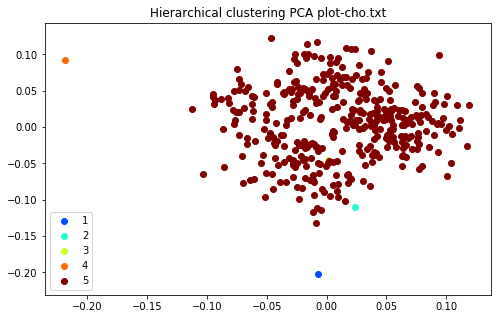

In [224]:
k=5
input_file="cho.txt"
h_clusters,ground_t=hierarchialClustering(input_file,k)
i = 1
for c in h_clusters:
    print('cluster ',i)
    print(c)
    i = i + 1
compute_externalIndex(geneexp,h_clusters)
h_labels=hac_labels(h_clusters)
plotPCA(geneexp,h_labels, 'Hierarchical clustering PCA plot-'+ input_file)


# IYER.TXT

parameters 517 | 14
[[ 0.          1.6572266   1.32026512 ...  9.67656964 11.12156014
  12.33195443]
 [ 1.6572266   0.          0.7327346  ...  8.49504561  9.97339962
  11.17966457]
 [ 1.32026512  0.7327346   0.         ...  8.81506098 10.24843403
  11.44573283]
 ...
 [ 9.67656964  8.49504561  8.81506098 ...  0.          2.1857493
   3.47411859]
 [11.12156014  9.97339962 10.24843403 ...  2.1857493   0.
   1.84390889]
 [12.33195443 11.17966457 11.44573283 ...  3.47411859  1.84390889
   0.        ]]
dimensions of dist matrix---------------------------
(517, 517)
combined-----------------------------------
211,179
combined-----------------------------------
46,45
combined-----------------------------------
72,71
combined-----------------------------------
169,159
combined-----------------------------------
193,32
combined-----------------------------------
24,23
combined-----------------------------------
211,179,158
combined-----------------------------------
246,50
combined-------------

combined-----------------------------------
284,11,80,69,243,226,215,214,180,113,182,199,134,193,32,33,172,171,162,173,141,136,135,137,139,31,169,159,78,22,61,70,54,143,58,44,38,160,46,45,59,24,23,112,216,211,179,158,170,155,213,149,21,20,167,63,4,140,87,181,168,14,197,133,157,156,16,81,178,55,165,84,164,25
combined-----------------------------------
284,11,80,69,243,226,215,214,180,113,182,199,134,193,32,33,172,171,162,173,141,136,135,137,139,31,169,159,78,22,61,70,54,143,58,44,38,160,46,45,59,24,23,112,216,211,179,158,170,155,213,149,21,20,167,63,4,140,87,181,168,14,197,133,157,156,16,81,178,55,165,84,164,25,138
combined-----------------------------------
161,131
combined-----------------------------------
284,11,80,69,243,226,215,214,180,113,182,199,134,193,32,33,172,171,162,173,141,136,135,137,139,31,169,159,78,22,61,70,54,143,58,44,38,160,46,45,59,24,23,112,216,211,179,158,170,155,213,149,21,20,167,63,4,140,87,181,168,14,197,133,157,156,16,81,178,55,165,84,164,25,138,161,131
combi

combined-----------------------------------
284,11,80,69,243,226,215,214,180,113,182,199,134,193,32,33,172,171,162,173,141,136,135,137,139,31,169,159,78,22,61,70,54,143,58,44,38,160,46,45,59,24,23,112,216,211,179,158,170,155,213,149,21,20,167,63,4,140,87,181,168,14,197,133,157,156,16,81,178,55,165,84,164,25,138,161,131,210,177,29,79,72,71,130,19,99,53,166,39,37,62,60,283,282,67,147,30,175,235,132,184,163,124,239,238,146,17
combined-----------------------------------
284,11,80,69,243,226,215,214,180,113,182,199,134,193,32,33,172,171,162,173,141,136,135,137,139,31,169,159,78,22,61,70,54,143,58,44,38,160,46,45,59,24,23,112,216,211,179,158,170,155,213,149,21,20,167,63,4,140,87,181,168,14,197,133,157,156,16,81,178,55,165,84,164,25,138,161,131,210,177,29,79,72,71,130,19,99,53,166,39,37,62,60,283,282,67,147,30,175,235,132,184,163,124,239,238,146,17,194
combined-----------------------------------
284,11,80,69,243,226,215,214,180,113,182,199,134,193,32,33,172,171,162,173,141,136,135,137,139,31,

combined-----------------------------------
316,284,11,80,69,243,226,215,214,180,113,182,199,134,193,32,33,172,171,162,173,141,136,135,137,139,31,169,159,78,22,61,70,54,143,58,44,38,160,46,45,59,24,23,112,216,211,179,158,170,155,213,149,21,20,167,63,4,140,87,181,168,14,197,133,157,156,16,81,178,55,165,84,164,25,138,161,131,210,177,29,79,72,71,130,19,99,53,166,39,37,62,60,283,282,67,147,30,175,235,132,184,163,124,239,238,146,17,194,154,47,152,95,92,91,241,144,66,57,35,174,77,10,52,246,50,200,97,96,42,13,220,34,48,255,250,114,281,75,9,115,27,129,40,195,198
combined-----------------------------------
316,284,11,80,69,243,226,215,214,180,113,182,199,134,193,32,33,172,171,162,173,141,136,135,137,139,31,169,159,78,22,61,70,54,143,58,44,38,160,46,45,59,24,23,112,216,211,179,158,170,155,213,149,21,20,167,63,4,140,87,181,168,14,197,133,157,156,16,81,178,55,165,84,164,25,138,161,131,210,177,29,79,72,71,130,19,99,53,166,39,37,62,60,283,282,67,147,30,175,235,132,184,163,124,239,238,146,17,194,154,

combined-----------------------------------
316,284,11,80,69,243,226,215,214,180,113,182,199,134,193,32,33,172,171,162,173,141,136,135,137,139,31,169,159,78,22,61,70,54,143,58,44,38,160,46,45,59,24,23,112,216,211,179,158,170,155,213,149,21,20,167,63,4,140,87,181,168,14,197,133,157,156,16,81,178,55,165,84,164,25,138,161,131,210,177,29,79,72,71,130,19,99,53,166,39,37,62,60,283,282,67,147,30,175,235,132,184,163,124,239,238,146,17,194,154,47,152,95,92,91,241,144,66,57,35,174,77,10,52,246,50,200,97,96,42,13,220,34,48,255,250,114,281,75,9,115,27,129,40,195,198,269,86,242,245,93,89,100,228,185,230,49,41,223,183,85,56,306,305,209,207,224,208,206,196,116,236,142,127,121,12,244,187,233,192,101,189,186
combined-----------------------------------
316,284,11,80,69,243,226,215,214,180,113,182,199,134,193,32,33,172,171,162,173,141,136,135,137,139,31,169,159,78,22,61,70,54,143,58,44,38,160,46,45,59,24,23,112,216,211,179,158,170,155,213,149,21,20,167,63,4,140,87,181,168,14,197,133,157,156,16,81,178,55,

combined-----------------------------------
318,105,316,284,11,80,69,243,226,215,214,180,113,182,199,134,193,32,33,172,171,162,173,141,136,135,137,139,31,169,159,78,22,61,70,54,143,58,44,38,160,46,45,59,24,23,112,216,211,179,158,170,155,213,149,21,20,167,63,4,140,87,181,168,14,197,133,157,156,16,81,178,55,165,84,164,25,138,161,131,210,177,29,79,72,71,130,19,99,53,166,39,37,62,60,283,282,67,147,30,175,235,132,184,163,124,239,238,146,17,194,154,47,152,95,92,91,241,144,66,57,35,174,77,10,52,246,50,200,97,96,42,13,220,34,48,255,250,114,281,75,9,115,27,129,40,195,198,269,86,242,245,93,89,100,228,185,230,49,41,223,183,85,56,306,305,209,207,224,208,206,196,116,236,142,127,121,12,244,187,233,192,101,189,186,15,123,122,148,109,191,231,310,188,36,82,28,68,125,279,273,83,18,8,7,3,145,205,218,232,248,217,247,64,5,43,151
combined-----------------------------------
318,105,316,284,11,80,69,243,226,215,214,180,113,182,199,134,193,32,33,172,171,162,173,141,136,135,137,139,31,169,159,78,22,61,70,54,143

combined-----------------------------------
318,105,316,284,11,80,69,243,226,215,214,180,113,182,199,134,193,32,33,172,171,162,173,141,136,135,137,139,31,169,159,78,22,61,70,54,143,58,44,38,160,46,45,59,24,23,112,216,211,179,158,170,155,213,149,21,20,167,63,4,140,87,181,168,14,197,133,157,156,16,81,178,55,165,84,164,25,138,161,131,210,177,29,79,72,71,130,19,99,53,166,39,37,62,60,283,282,67,147,30,175,235,132,184,163,124,239,238,146,17,194,154,47,152,95,92,91,241,144,66,57,35,174,77,10,52,246,50,200,97,96,42,13,220,34,48,255,250,114,281,75,9,115,27,129,40,195,198,269,86,242,245,93,89,100,228,185,230,49,41,223,183,85,56,306,305,209,207,224,208,206,196,116,236,142,127,121,12,244,187,233,192,101,189,186,15,123,122,148,109,191,231,310,188,36,82,28,68,125,279,273,83,18,8,7,3,145,205,218,232,248,217,247,64,5,43,151,111,51,204,227,190,274,252,280,285,117,176,271,317,94,272,88,237,153,150,229
combined-----------------------------------
318,105,316,284,11,80,69,243,226,215,214,180,113,182,199,13

combined-----------------------------------
499,318,105,316,284,11,80,69,243,226,215,214,180,113,182,199,134,193,32,33,172,171,162,173,141,136,135,137,139,31,169,159,78,22,61,70,54,143,58,44,38,160,46,45,59,24,23,112,216,211,179,158,170,155,213,149,21,20,167,63,4,140,87,181,168,14,197,133,157,156,16,81,178,55,165,84,164,25,138,161,131,210,177,29,79,72,71,130,19,99,53,166,39,37,62,60,283,282,67,147,30,175,235,132,184,163,124,239,238,146,17,194,154,47,152,95,92,91,241,144,66,57,35,174,77,10,52,246,50,200,97,96,42,13,220,34,48,255,250,114,281,75,9,115,27,129,40,195,198,269,86,242,245,93,89,100,228,185,230,49,41,223,183,85,56,306,305,209,207,224,208,206,196,116,236,142,127,121,12,244,187,233,192,101,189,186,15,123,122,148,109,191,231,310,188,36,82,28,68,125,279,273,83,18,8,7,3,145,205,218,232,248,217,247,64,5,43,151,111,51,204,227,190,274,252,280,285,117,176,271,317,94,272,88,237,153,150,229,26,65,118,203,202,212,201,251,275,249,234,240,1,278,108,128,110,266,267,107,256,261,106,307,6
combi

combined-----------------------------------
440,439
combined-----------------------------------
340,336,302,337
combined-----------------------------------
499,318,105,316,284,11,80,69,243,226,215,214,180,113,182,199,134,193,32,33,172,171,162,173,141,136,135,137,139,31,169,159,78,22,61,70,54,143,58,44,38,160,46,45,59,24,23,112,216,211,179,158,170,155,213,149,21,20,167,63,4,140,87,181,168,14,197,133,157,156,16,81,178,55,165,84,164,25,138,161,131,210,177,29,79,72,71,130,19,99,53,166,39,37,62,60,283,282,67,147,30,175,235,132,184,163,124,239,238,146,17,194,154,47,152,95,92,91,241,144,66,57,35,174,77,10,52,246,50,200,97,96,42,13,220,34,48,255,250,114,281,75,9,115,27,129,40,195,198,269,86,242,245,93,89,100,228,185,230,49,41,223,183,85,56,306,305,209,207,224,208,206,196,116,236,142,127,121,12,244,187,233,192,101,189,186,15,123,122,148,109,191,231,310,188,36,82,28,68,125,279,273,83,18,8,7,3,145,205,218,232,248,217,247,64,5,43,151,111,51,204,227,190,274,252,280,285,117,176,271,317,94,272,88,237

499,318,105,316,284,11,80,69,243,226,215,214,180,113,182,199,134,193,32,33,172,171,162,173,141,136,135,137,139,31,169,159,78,22,61,70,54,143,58,44,38,160,46,45,59,24,23,112,216,211,179,158,170,155,213,149,21,20,167,63,4,140,87,181,168,14,197,133,157,156,16,81,178,55,165,84,164,25,138,161,131,210,177,29,79,72,71,130,19,99,53,166,39,37,62,60,283,282,67,147,30,175,235,132,184,163,124,239,238,146,17,194,154,47,152,95,92,91,241,144,66,57,35,174,77,10,52,246,50,200,97,96,42,13,220,34,48,255,250,114,281,75,9,115,27,129,40,195,198,269,86,242,245,93,89,100,228,185,230,49,41,223,183,85,56,306,305,209,207,224,208,206,196,116,236,142,127,121,12,244,187,233,192,101,189,186,15,123,122,148,109,191,231,310,188,36,82,28,68,125,279,273,83,18,8,7,3,145,205,218,232,248,217,247,64,5,43,151,111,51,204,227,190,274,252,280,285,117,176,271,317,94,272,88,237,153,150,229,26,65,118,203,202,212,201,251,275,249,234,240,1,278,108,128,110,266,267,107,256,261,106,307,6,277,295,225,104,103,268,76,222,304,126,253,260,27

combined-----------------------------------
499,318,105,316,284,11,80,69,243,226,215,214,180,113,182,199,134,193,32,33,172,171,162,173,141,136,135,137,139,31,169,159,78,22,61,70,54,143,58,44,38,160,46,45,59,24,23,112,216,211,179,158,170,155,213,149,21,20,167,63,4,140,87,181,168,14,197,133,157,156,16,81,178,55,165,84,164,25,138,161,131,210,177,29,79,72,71,130,19,99,53,166,39,37,62,60,283,282,67,147,30,175,235,132,184,163,124,239,238,146,17,194,154,47,152,95,92,91,241,144,66,57,35,174,77,10,52,246,50,200,97,96,42,13,220,34,48,255,250,114,281,75,9,115,27,129,40,195,198,269,86,242,245,93,89,100,228,185,230,49,41,223,183,85,56,306,305,209,207,224,208,206,196,116,236,142,127,121,12,244,187,233,192,101,189,186,15,123,122,148,109,191,231,310,188,36,82,28,68,125,279,273,83,18,8,7,3,145,205,218,232,248,217,247,64,5,43,151,111,51,204,227,190,274,252,280,285,117,176,271,317,94,272,88,237,153,150,229,26,65,118,203,202,212,201,251,275,249,234,240,1,278,108,128,110,266,267,107,256,261,106,307,6,277,2

combined-----------------------------------
469,428,427
combined-----------------------------------
499,318,105,316,284,11,80,69,243,226,215,214,180,113,182,199,134,193,32,33,172,171,162,173,141,136,135,137,139,31,169,159,78,22,61,70,54,143,58,44,38,160,46,45,59,24,23,112,216,211,179,158,170,155,213,149,21,20,167,63,4,140,87,181,168,14,197,133,157,156,16,81,178,55,165,84,164,25,138,161,131,210,177,29,79,72,71,130,19,99,53,166,39,37,62,60,283,282,67,147,30,175,235,132,184,163,124,239,238,146,17,194,154,47,152,95,92,91,241,144,66,57,35,174,77,10,52,246,50,200,97,96,42,13,220,34,48,255,250,114,281,75,9,115,27,129,40,195,198,269,86,242,245,93,89,100,228,185,230,49,41,223,183,85,56,306,305,209,207,224,208,206,196,116,236,142,127,121,12,244,187,233,192,101,189,186,15,123,122,148,109,191,231,310,188,36,82,28,68,125,279,273,83,18,8,7,3,145,205,218,232,248,217,247,64,5,43,151,111,51,204,227,190,274,252,280,285,117,176,271,317,94,272,88,237,153,150,229,26,65,118,203,202,212,201,251,275,249,234,2

combined-----------------------------------
499,318,105,316,284,11,80,69,243,226,215,214,180,113,182,199,134,193,32,33,172,171,162,173,141,136,135,137,139,31,169,159,78,22,61,70,54,143,58,44,38,160,46,45,59,24,23,112,216,211,179,158,170,155,213,149,21,20,167,63,4,140,87,181,168,14,197,133,157,156,16,81,178,55,165,84,164,25,138,161,131,210,177,29,79,72,71,130,19,99,53,166,39,37,62,60,283,282,67,147,30,175,235,132,184,163,124,239,238,146,17,194,154,47,152,95,92,91,241,144,66,57,35,174,77,10,52,246,50,200,97,96,42,13,220,34,48,255,250,114,281,75,9,115,27,129,40,195,198,269,86,242,245,93,89,100,228,185,230,49,41,223,183,85,56,306,305,209,207,224,208,206,196,116,236,142,127,121,12,244,187,233,192,101,189,186,15,123,122,148,109,191,231,310,188,36,82,28,68,125,279,273,83,18,8,7,3,145,205,218,232,248,217,247,64,5,43,151,111,51,204,227,190,274,252,280,285,117,176,271,317,94,272,88,237,153,150,229,26,65,118,203,202,212,201,251,275,249,234,240,1,278,108,128,110,266,267,107,256,261,106,307,6,277,2

combined-----------------------------------
502,500,499,318,105,316,284,11,80,69,243,226,215,214,180,113,182,199,134,193,32,33,172,171,162,173,141,136,135,137,139,31,169,159,78,22,61,70,54,143,58,44,38,160,46,45,59,24,23,112,216,211,179,158,170,155,213,149,21,20,167,63,4,140,87,181,168,14,197,133,157,156,16,81,178,55,165,84,164,25,138,161,131,210,177,29,79,72,71,130,19,99,53,166,39,37,62,60,283,282,67,147,30,175,235,132,184,163,124,239,238,146,17,194,154,47,152,95,92,91,241,144,66,57,35,174,77,10,52,246,50,200,97,96,42,13,220,34,48,255,250,114,281,75,9,115,27,129,40,195,198,269,86,242,245,93,89,100,228,185,230,49,41,223,183,85,56,306,305,209,207,224,208,206,196,116,236,142,127,121,12,244,187,233,192,101,189,186,15,123,122,148,109,191,231,310,188,36,82,28,68,125,279,273,83,18,8,7,3,145,205,218,232,248,217,247,64,5,43,151,111,51,204,227,190,274,252,280,285,117,176,271,317,94,272,88,237,153,150,229,26,65,118,203,202,212,201,251,275,249,234,240,1,278,108,128,110,266,267,107,256,261,106,307

combined-----------------------------------
512,505,511,498,502,500,499,318,105,316,284,11,80,69,243,226,215,214,180,113,182,199,134,193,32,33,172,171,162,173,141,136,135,137,139,31,169,159,78,22,61,70,54,143,58,44,38,160,46,45,59,24,23,112,216,211,179,158,170,155,213,149,21,20,167,63,4,140,87,181,168,14,197,133,157,156,16,81,178,55,165,84,164,25,138,161,131,210,177,29,79,72,71,130,19,99,53,166,39,37,62,60,283,282,67,147,30,175,235,132,184,163,124,239,238,146,17,194,154,47,152,95,92,91,241,144,66,57,35,174,77,10,52,246,50,200,97,96,42,13,220,34,48,255,250,114,281,75,9,115,27,129,40,195,198,269,86,242,245,93,89,100,228,185,230,49,41,223,183,85,56,306,305,209,207,224,208,206,196,116,236,142,127,121,12,244,187,233,192,101,189,186,15,123,122,148,109,191,231,310,188,36,82,28,68,125,279,273,83,18,8,7,3,145,205,218,232,248,217,247,64,5,43,151,111,51,204,227,190,274,252,280,285,117,176,271,317,94,272,88,237,153,150,229,26,65,118,203,202,212,201,251,275,249,234,240,1,278,108,128,110,266,267,107

combined-----------------------------------
503,501
combined-----------------------------------
379,378,362
combined-----------------------------------
513,512,505,511,498,502,500,499,318,105,316,284,11,80,69,243,226,215,214,180,113,182,199,134,193,32,33,172,171,162,173,141,136,135,137,139,31,169,159,78,22,61,70,54,143,58,44,38,160,46,45,59,24,23,112,216,211,179,158,170,155,213,149,21,20,167,63,4,140,87,181,168,14,197,133,157,156,16,81,178,55,165,84,164,25,138,161,131,210,177,29,79,72,71,130,19,99,53,166,39,37,62,60,283,282,67,147,30,175,235,132,184,163,124,239,238,146,17,194,154,47,152,95,92,91,241,144,66,57,35,174,77,10,52,246,50,200,97,96,42,13,220,34,48,255,250,114,281,75,9,115,27,129,40,195,198,269,86,242,245,93,89,100,228,185,230,49,41,223,183,85,56,306,305,209,207,224,208,206,196,116,236,142,127,121,12,244,187,233,192,101,189,186,15,123,122,148,109,191,231,310,188,36,82,28,68,125,279,273,83,18,8,7,3,145,205,218,232,248,217,247,64,5,43,151,111,51,204,227,190,274,252,280,285,117,1

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

jaccard_coefficient:  0.1584602101134175
rand_index:  0.1941381800223728


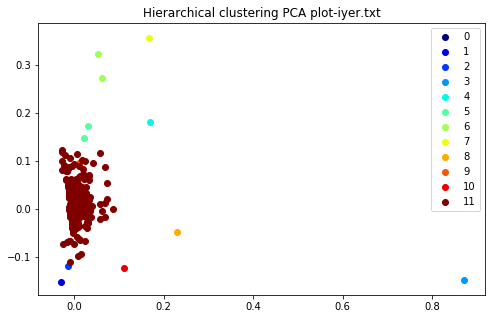

In [218]:
k=11
input_file="iyer.txt"
h_clusters,ground_t=hierarchialClustering(input_file,k)
i = 1
for c in h_clusters:
    print('cluster ',i)
    print(c)
    i = i + 1
compute_externalIndex(geneexp,h_clusters)
h_labels=hac_labels(h_clusters)
plotPCA(geneexp,h_labels, 'Hierarchical clustering PCA plot-'+ input_file)


# DEMO DATASET

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


parameters 6 | 7
combined-----------------------------------
2,1
combined-----------------------------------
3,2,1
combined-----------------------------------
6,5
combined-----------------------------------
6,5,4
finalclusters-----------------------------------
[[3, 2, 1], [6, 5, 4]]
cluster  1
[3, 2, 1]
cluster  2
[6, 5, 4]
jaccard_coefficient:  1.0
rand_index:  1.0


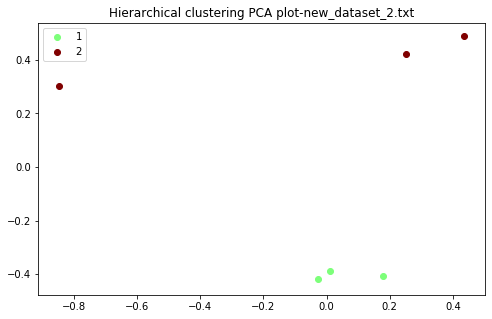

In [226]:
k=2
input_file="new_dataset_2.txt"
h_clusters,ground_t=hierarchialClustering(input_file,k)
i = 1
for c in h_clusters:
    print('cluster ',i)
    print(c)
    i = i + 1
compute_externalIndex(geneexp,h_clusters)
h_labels=hac_labels(h_clusters)
plotPCA(geneexp,h_labels, 'Hierarchical clustering PCA plot-'+ input_file)
